In [1]:
import sys
!{sys.executable} -m pip install python-docx

Aprila 2019 je bil sprejet zakon o odjavljenih vozilih. Ali se je kaj spremenilo?

In [2]:
from csv import DictReader
import operator
import matplotlib.pyplot as plt

meseci = dict()
tip_vozila = dict()

for i in range(1,13):
    file = 'podatki/Podatki_{:02d}'.format(i) + str(2019) + '.csv'
    podatki = DictReader(open(file, 'rt', encoding='ANSI'), delimiter=';')

    if i not in meseci:
        meseci[i] = 0

    for row in podatki:
        status = str(row['Status vozila (opis)'])
        if status == 'odjavljeno':
            meseci[i] += 1
            tip = str(row['J-Kategorija in vrsta vozila (opis)'])
            if tip not in tip_vozila:
                tip_vozila[tip] = 0
            tip_vozila[tip] += 1

meseci1 = list(meseci.keys())
st_odjavljenih_vozil = list(meseci.values())

print(tip_vozila)

{'osebni avtomobil': 14047, 'traktor': 365, 'tovorno vozilo': 2883, 'motorno kolo': 49, 'vlečno vozilo': 59, 'priklopno vozilo': 39, 'delovno vozilo': 2, 'motorno kolo enduro': 1, 'trikolo': 4, 'moped-dvokolo': 3, 'motorno kolo z visoko močjo': 15, 'štirikolo': 1, 'trikolesnik': 35, 'štirikolo za vse terene': 2, 'motorno kolo s srednjo močjo': 38, 'motorno kolo z nizko močjo': 26, 'dvokolesni moped': 8, 'lahko štirikolo': 1, 'traktorski priklopnik': 1}


In [3]:
import operator
import numpy as np
import os
from csv import DictReader

datoteke = os.listdir("podatki/")
podatki_o_vozilih = []
for dat in datoteke:
    if "Podatki" in dat and "2020" not in dat:
        neki = DictReader(open('podatki/' + dat, 'rt', encoding='ANSI'), delimiter=';')
        for i in neki:
            if i["Status vozila (opis)"] == "odjavljeno":
                podatki_o_vozilih.append([i["Status vozila (opis)"], dat[8:-4]])
                
podatki_o_vozilih = np.array(podatki_o_vozilih)

In [4]:
# Dobimo število odjavljenih vozil glede na mesec in leto
odjavljena = dict()
for i in podatki_o_vozilih:
    if i[1] not in odjavljena:
        odjavljena[i[1]] = 0
    odjavljena[i[1]] += 1
odjavljena

{'012015': 210,
 '012016': 165,
 '012017': 1244,
 '012018': 950,
 '012019': 1616,
 '022015': 384,
 '022016': 292,
 '022017': 1124,
 '022018': 1073,
 '022019': 1680,
 '032015': 132,
 '032016': 554,
 '032017': 744,
 '032018': 1332,
 '032019': 1687,
 '042015': 131,
 '042016': 805,
 '042017': 675,
 '042018': 1032,
 '042019': 1294,
 '052015': 94,
 '052016': 1074,
 '052017': 1298,
 '052018': 976,
 '052019': 1695,
 '062015': 404,
 '062016': 1016,
 '062017': 1066,
 '062018': 1098,
 '062019': 1986,
 '072015': 175,
 '072016': 652,
 '072017': 923,
 '072018': 1183,
 '072019': 1345,
 '082015': 88,
 '082016': 540,
 '082017': 713,
 '082018': 1134,
 '082019': 1118,
 '092015': 118,
 '092016': 706,
 '092017': 783,
 '092018': 611,
 '092019': 997,
 '102015': 197,
 '102016': 667,
 '102017': 1402,
 '102018': 1105,
 '102019': 1286,
 '112015': 134,
 '112016': 882,
 '112017': 1632,
 '112018': 1128,
 '112019': 1340,
 '122015': 96,
 '122016': 679,
 '122017': 1038,
 '122018': 871,
 '122019': 1535}

In [5]:
# Grupiramo po letih
leta = dict()
for i in odjavljena:
    a = str(i)
    if a[-2:] not in leta:
        leta[a[-2:]] = []
    leta[a[-2:]].append(odjavljena[i])

In [6]:
# Prilagodimo ključe za izpis X-osi
x = []
y = []
stevec = 1
for i in leta:
    stevec = 1
    for j in leta[i]:
        y.append(j)
        x.append(str(stevec) + "_" + str(i))
        stevec += 1

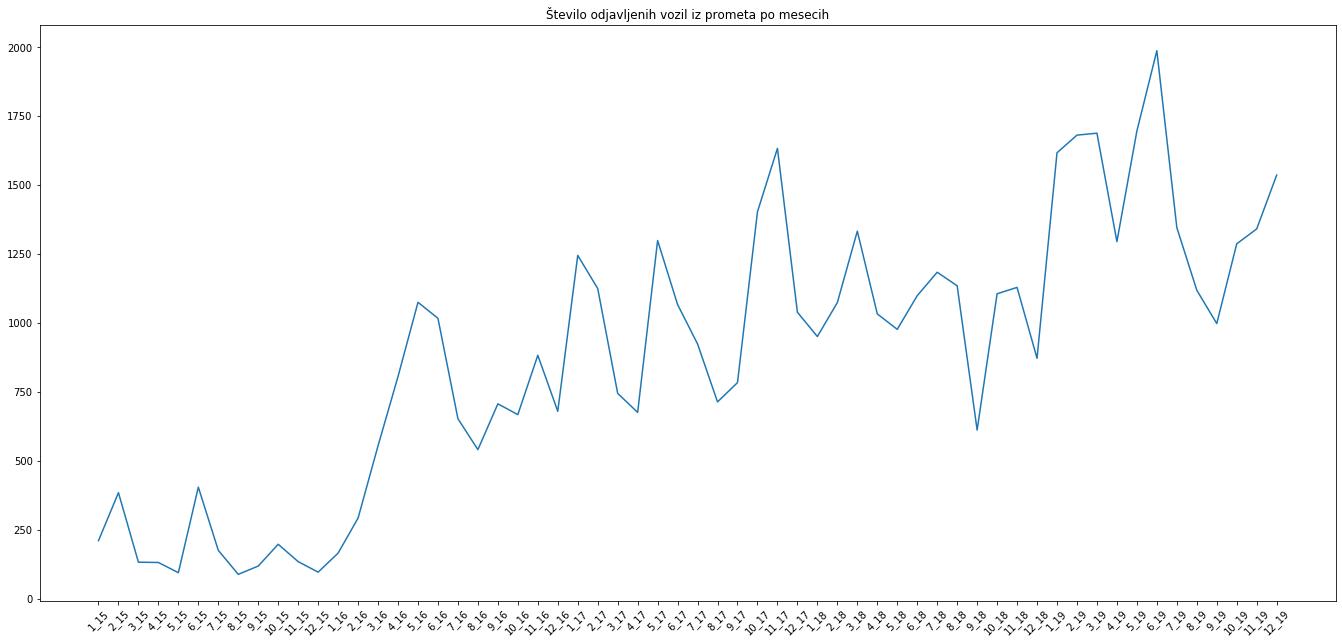

In [7]:
# Prikažemo graf
plt.axes([0, 0.6, 3, 2])
plt.xticks(rotation=45)
plt.title("Število odjavljenih vozil iz prometa po mesecih")
plt.plot(x,y)

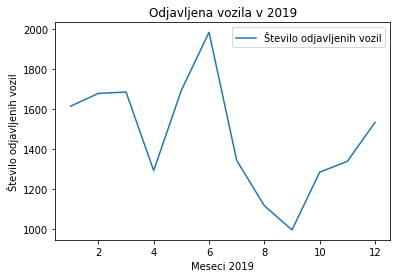

In [8]:
# Pogledamo, kaj se je zgodilo v letu 2019, ko je bil 1. aprila sprejet nov zakon o odjavi vozila iz prometa
plt.plot(meseci1, st_odjavljenih_vozil, label='Število odjavljenih vozil')
plt.title('Odjavljena vozila v 2019')
plt.xlabel('Meseci 2019')
plt.ylabel('Število odjavljenih vozil')
plt.legend()
plt.show()

In [9]:
from docx import Document
from datetime import datetime

bencinDoc = Document('podatki/Neosvincen-motorn-bencin-95-oktanski.docx')
dizelDoc = Document('podatki/Dizelsko-gorivo.docx')

bencin = dict()
dizel = dict()

for table in bencinDoc.tables:
    for row in table.rows[1:]:
        cena_goriva = float(row.cells[7].text.replace(',','.'))
        datum = datetime.strptime(row.cells[0].text, '%d.%m.%Y')
        if datum.year <= 2019 and datum.year >= 2015:
            bencin[datum] = cena_goriva
        if datum.year < 2015:
            break

for table in dizelDoc.tables:
    for row in table.rows[1:]:
        cena_goriva = float(row.cells[7].text.replace(',','.'))
        datum = datetime.strptime(row.cells[0].text, '%d.%m.%Y')
        if datum.year <= 2019 and datum.year >= 2015:
            dizel[datum] = cena_goriva
        if datum.year < 2015:
            break


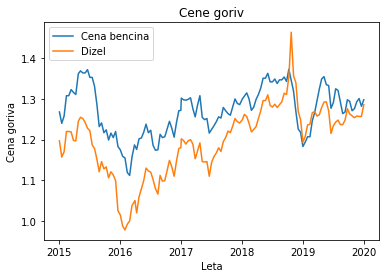

In [10]:
# Izris cene dizla in bencina med letoma 2015 in 2019
plt.plot(list(bencin.keys()), list(bencin.values()), label='Cena bencina')
plt.plot(list(dizel.keys()), list(dizel.values()), label='Dizel')
plt.title('Cene goriv')
plt.xlabel('Leta')
plt.ylabel('Cena goriva')
plt.legend()
plt.show()
